# Normalizing Time Series to a Base Value

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('multi_assets.csv', header=[0, 1], index_col=0, parse_dates=True)

In [3]:
df.Close

Ticker,BA,BTC-USD,EURUSD=X,GC=F,^DJI
Date,,,,,
2014-10-21 00:00:00+00:00,127.120003,386.475006,1.279525,1251.000000,16614.810547
2014-10-22 00:00:00+00:00,121.449997,383.157990,1.271472,1244.800049,16461.320312
2014-10-23 00:00:00+00:00,122.029999,358.416992,1.264143,1228.500000,16677.900391
2014-10-24 00:00:00+00:00,122.239998,358.345001,1.265406,1231.199951,16805.410156
2014-10-25 00:00:00+00:00,NaN,347.270996,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-16 00:00:00+00:00,154.899994,67612.718750,1.088412,2674.000000,43077.699219
2024-10-17 00:00:00+00:00,155.309998,67399.835938,1.086248,2691.000000,43239.050781
2024-10-18 00:00:00+00:00,155.000000,68418.789062,1.082954,2713.699951,43275.910156


In [4]:
close = df.Close

In [5]:
close.BA.div(close.iloc[0, 0])

Date
2014-10-21 00:00:00+00:00    1.000000
2014-10-22 00:00:00+00:00    0.955396
2014-10-23 00:00:00+00:00    0.959959
2014-10-24 00:00:00+00:00    0.961611
2014-10-25 00:00:00+00:00         NaN
                               ...   
2024-10-16 00:00:00+00:00    1.218534
2024-10-17 00:00:00+00:00    1.221759
2024-10-18 00:00:00+00:00    1.219320
2024-10-19 00:00:00+00:00         NaN
2024-10-20 00:00:00+00:00         NaN
Name: BA, Length: 3653, dtype: float64

In [6]:
close.iloc[0]

Ticker
BA            127.120003
BTC-USD       386.475006
EURUSD=X        1.279525
GC=F         1251.000000
^DJI        16614.810547
Name: 2014-10-21 00:00:00+00:00, dtype: float64

In [7]:
norm = close.div(close.iloc[0]).mul(100)

In [8]:
norm

Ticker,BA,BTC-USD,EURUSD=X,GC=F,^DJI
Date,,,,,
2014-10-21 00:00:00+00:00,100.000000,100.000000,100.000000,100.000000,100.000000
2014-10-22 00:00:00+00:00,95.539643,99.141725,99.370621,99.504400,99.076184
2014-10-23 00:00:00+00:00,95.995906,92.740019,98.797794,98.201439,100.379721
2014-10-24 00:00:00+00:00,96.161104,92.721391,98.896560,98.417262,101.147167
2014-10-25 00:00:00+00:00,NaN,89.856004,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-16 00:00:00+00:00,121.853359,17494.719628,85.063727,213.749001,259.272888
2024-10-17 00:00:00+00:00,122.175892,17439.636425,84.894639,215.107914,260.244019
2024-10-18 00:00:00+00:00,121.932030,17703.289471,84.637209,216.922458,260.465866


<AxesSubplot: xlabel='Date'>

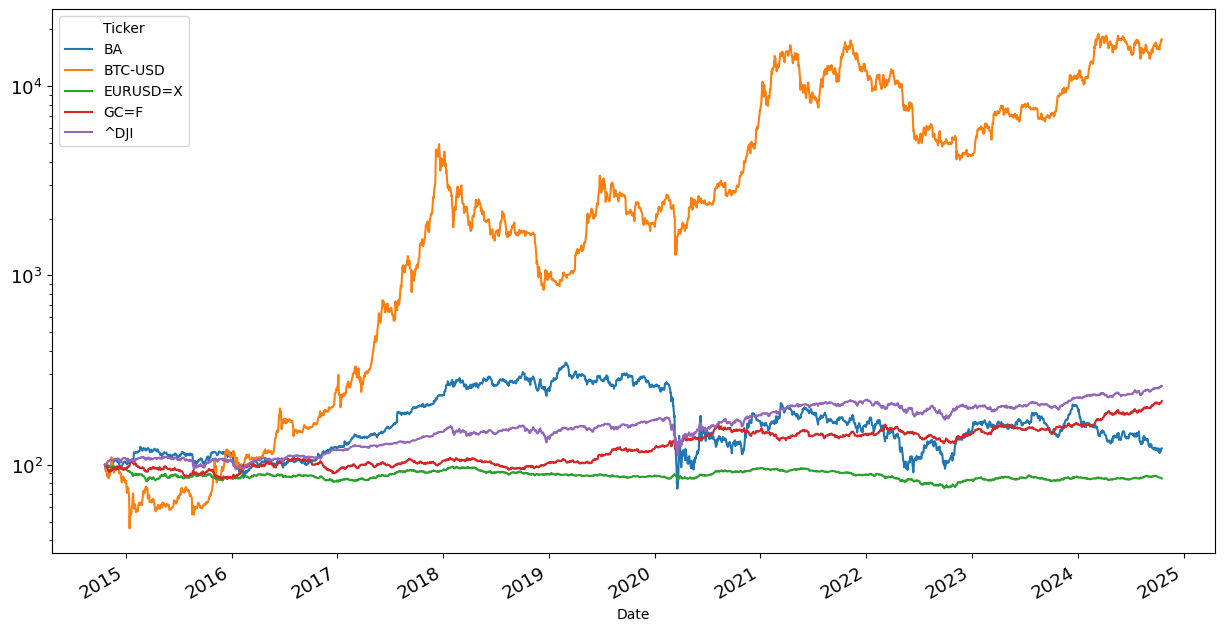

In [10]:
norm.dropna().plot(figsize=(15, 8), fontsize=13, logy=True)

In [11]:
close.to_csv("close.csv")